In [ ]:
pip install numpy matplotlib


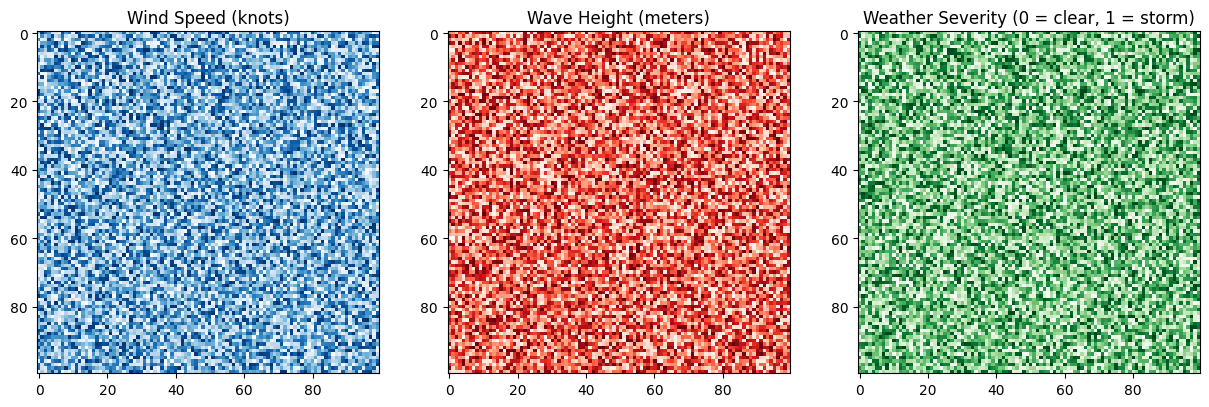

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set grid size for the Indian Ocean
grid_size = (100, 100)

# Randomly generate sample wind speed, wave height, and weather severity for the grid
np.random.seed(42)  # Seed for reproducibility
wind_speed = np.random.uniform(5, 20, grid_size)  # in knots
wave_height = np.random.uniform(1, 10, grid_size)  # in meters
weather_severity = np.random.uniform(0, 1, grid_size)  # 0 = clear, 1 = storm

# Plotting the sample data
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Wind Speed
axs[0].imshow(wind_speed, cmap='Blues')
axs[0].set_title('Wind Speed (knots)')

# Wave Height
axs[1].imshow(wave_height, cmap='Reds')
axs[1].set_title('Wave Height (meters)')

# Weather Severity
axs[2].imshow(weather_severity, cmap='Greens')
axs[2].set_title('Weather Severity (0 = clear, 1 = storm)')

plt.show()


In [ ]:
def cost_function(route, wind_speed, wave_height, weather_severity):
    cost = 0
    for point in route:
        x, y = point
        # Travel time is inversely proportional to wind speed, but with a penalty for high waves and bad weather
        time_penalty = 1 / (wind_speed[x, y] + 1)  # Inverse of wind speed
        weather_penalty = weather_severity[x, y] + wave_height[x, y] / 10
        cost += time_penalty * (1 + weather_penalty)  # Adjusted cost
    return cost


In [ ]:
class Particle:
    def __init__(self, grid_size, start, end):
        self.position = [start]
        self.velocity = np.random.rand(2) - 0.5
        self.best_position = self.position
        self.best_cost = float('inf')
        self.current_cost = float('inf')
        self.end = end
        self.grid_size = grid_size

    def update_position(self):
        next_x = min(max(int(self.position[-1][0] + self.velocity[0]), 0), self.grid_size[0] - 1)
        next_y = min(max(int(self.position[-1][1] + self.velocity[1]), 0), self.grid_size[1] - 1)
        self.position.append([next_x, next_y])

    def update_velocity(self, global_best_position):
        inertia = 0.5
        cognitive = 0.8 * np.random.rand(2) * (np.array(self.best_position[-1]) - np.array(self.position[-1]))
        social = 0.8 * np.random.rand(2) * (np.array(global_best_position[-1]) - np.array(self.position[-1]))
        self.velocity = inertia * np.array(self.velocity) + cognitive + social

    def evaluate_cost(self, wind_speed, wave_height, weather_severity):
        self.current_cost = cost_function(self.position, wind_speed, wave_height, weather_severity)
        if self.current_cost < self.best_cost:
            self.best_cost = self.current_cost
            self.best_position = self.position

def pso(grid_size, wind_speed, wave_height, weather_severity, start, end, num_particles=30, max_iters=100):
    # Initialize particles
    particles = [Particle(grid_size, start, end) for _ in range(num_particles)]
    global_best_position = particles[0].position
    global_best_cost = float('inf')

    for _ in range(max_iters):
        for particle in particles:
            particle.update_position()
            particle.evaluate_cost(wind_speed, wave_height, weather_severity)
            particle.update_velocity(global_best_position)

            if particle.best_cost < global_best_cost:
                global_best_cost = particle.best_cost
                global_best_position = particle.best_position

    return global_best_position, global_best_cost

# Define start and end points
start_point = (0, 0)  # Top-left corner of the grid
end_point = (99, 99)  # Bottom-right corner

# Run PSO
best_route, best_cost = pso(grid_size, wind_speed, wave_height, weather_severity, start_point, end_point)


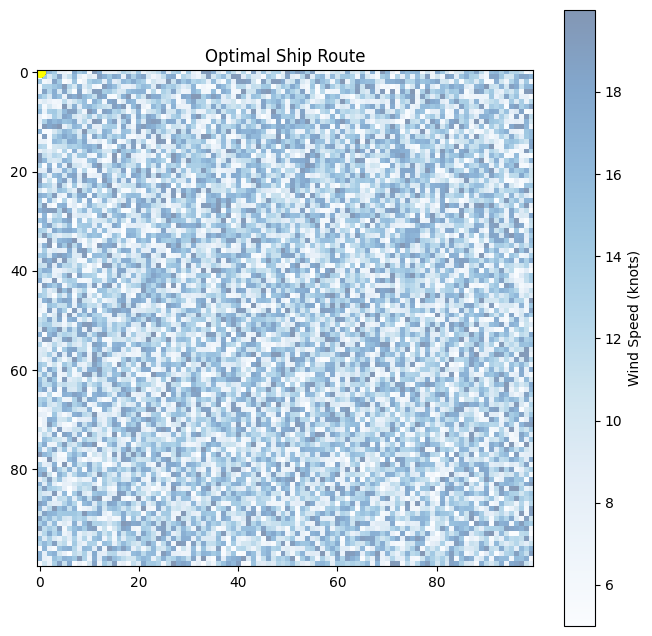

Best Route Cost: 0.37291376648701036


In [ ]:
def plot_route(route, wind_speed, wave_height, weather_severity):
    plt.figure(figsize=(8, 8))
    plt.imshow(wind_speed, cmap='Blues', alpha=0.5)
    plt.plot([p[1] for p in route], [p[0] for p in route], color='yellow', marker='o')
    plt.title('Optimal Ship Route')
    plt.colorbar(label='Wind Speed (knots)')
    plt.show()

plot_route(best_route, wind_speed, wave_height, weather_severity)
print(f"Best Route Cost: {best_cost}")


In [ ]:
# Define bounds for the Indian Ocean (approximate)
lat_bounds = (-20, 30)  # Latitude range: 20°S to 30°N
lon_bounds = (20, 120)  # Longitude range: 20°E to 120°E

# Create a grid with lat/lon values instead of generic grid points
lat_grid = np.linspace(lat_bounds[0], lat_bounds[1], grid_size[0])
lon_grid = np.linspace(lon_bounds[0], lon_bounds[1], grid_size[1])

# Generate sample wind speed, wave height, and weather severity based on known patterns
wind_speed = np.random.uniform(5, 20, grid_size)  # Stronger winds near the equator
wave_height = np.random.uniform(1, 8, grid_size)  # Higher waves near the southern latitudes
weather_severity = np.random.uniform(0, 1, grid_size)

# You can now treat the grid as representing real coordinates in the Indian Ocean


In [ ]:
pip install cartopy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 66.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


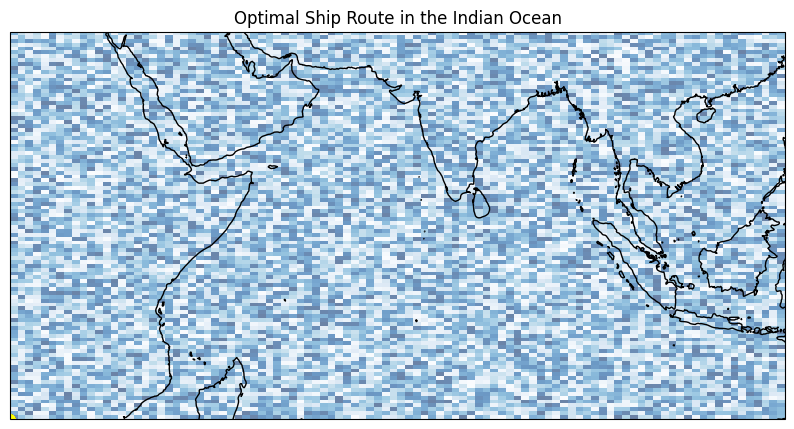

In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Create a map of the Indian Ocean
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())
ax.coastlines()

# Plot wind data on the map
plt.imshow(wind_speed, extent=[lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], origin='lower', cmap='Blues', alpha=0.6)

# Plot the optimal route
lat_route = [lat_grid[p[0]] for p in best_route]
lon_route = [lon_grid[p[1]] for p in best_route]
plt.plot(lon_route, lat_route, color='yellow', marker='o', transform=ccrs.PlateCarree())

plt.title("Optimal Ship Route in the Indian Ocean")
plt.show()


In [ ]:
# Define coordinates for Mumbai and Chennai
mumbai_coords = (19.0760, 72.8777)  # Mumbai: Latitude, Longitude
chennai_coords = (13.0827, 80.2707)  # Chennai: Latitude, Longitude

# Define a grid for the region between Mumbai and Chennai
lat_bounds = (12, 20)  # Covering the latitude range around the route
lon_bounds = (70, 82)  # Covering the longitude range around the route
grid_size = (100, 100)

# Create a lat/lon grid
lat_grid = np.linspace(lat_bounds[0], lat_bounds[1], grid_size[0])
lon_grid = np.linspace(lon_bounds[0], lon_bounds[1], grid_size[1])

# Find the grid indices for Mumbai and Chennai
def find_grid_point(lat, lon, lat_grid, lon_grid):
    lat_idx = np.argmin(np.abs(lat_grid - lat))
    lon_idx = np.argmin(np.abs(lon_grid - lon))
    return (lat_idx, lon_idx)

start_point = find_grid_point(mumbai_coords[0], mumbai_coords[1], lat_grid, lon_grid)
end_point = find_grid_point(chennai_coords[0], chennai_coords[1], lat_grid, lon_grid)

print(f"Mumbai grid point: {start_point}, Chennai grid point: {end_point}")


Mumbai grid point: (88, 24), Chennai grid point: (13, 85)


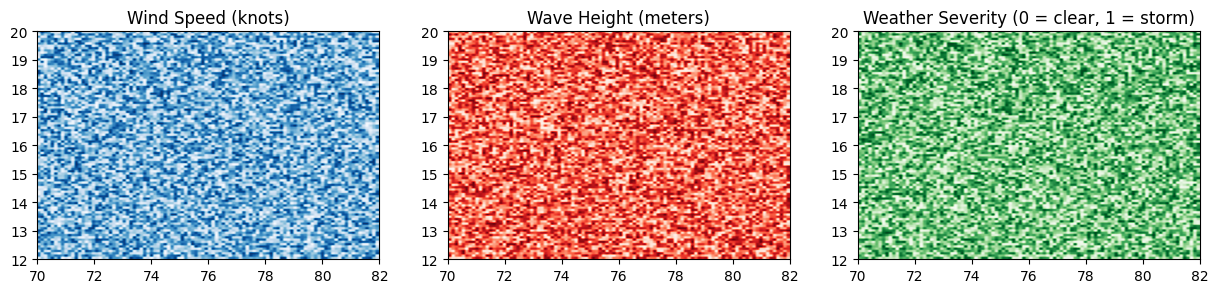

In [ ]:
# Simulate wind, wave, and weather data for the region
np.random.seed(42)
wind_speed = np.random.uniform(5, 20, grid_size)  # in knots
wave_height = np.random.uniform(1, 8, grid_size)  # in meters
weather_severity = np.random.uniform(0, 1, grid_size)  # 0 = clear, 1 = storm

# Plot the data to visualize the conditions between Mumbai and Chennai
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(wind_speed, extent=[lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], cmap='Blues')
axs[0].set_title('Wind Speed (knots)')

axs[1].imshow(wave_height, extent=[lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], cmap='Reds')
axs[1].set_title('Wave Height (meters)')

axs[2].imshow(weather_severity, extent=[lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], cmap='Greens')
axs[2].set_title('Weather Severity (0 = clear, 1 = storm)')

plt.show()


In [ ]:
# Reuse the PSO algorithm from earlier
best_route, best_cost = pso(grid_size, wind_speed, wave_height, weather_severity, start_point, end_point)

# Convert the grid points back to lat/lon for visualization
lat_route = [lat_grid[p[0]] for p in best_route]
lon_route = [lon_grid[p[1]] for p in best_route]

print(f"Best Route Cost: {best_cost}")


Best Route Cost: 0.18417123313774647


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


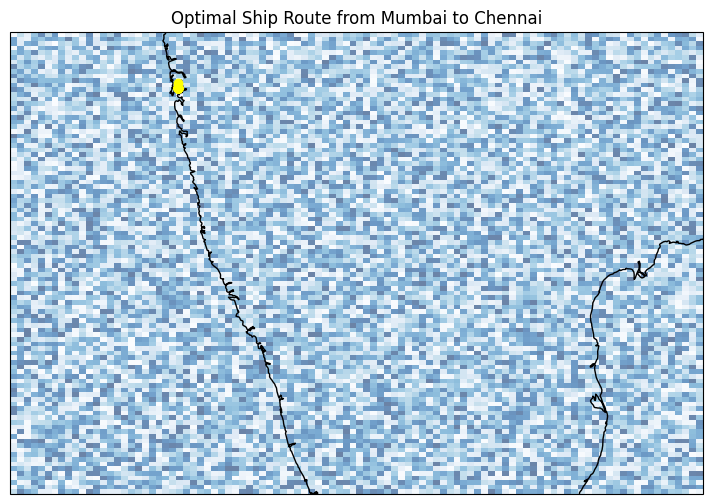

In [ ]:
# Visualize the optimal route from Mumbai to Chennai
import cartopy.crs as ccrs

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())
ax.coastlines()

# Plot the wind data
plt.imshow(wind_speed, extent=[lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], origin='lower', cmap='Blues', alpha=0.6)

# Plot the optimal route
plt.plot(lon_route, lat_route, color='yellow', marker='o', transform=ccrs.PlateCarree())

plt.title("Optimal Ship Route from Mumbai to Chennai")
plt.show()


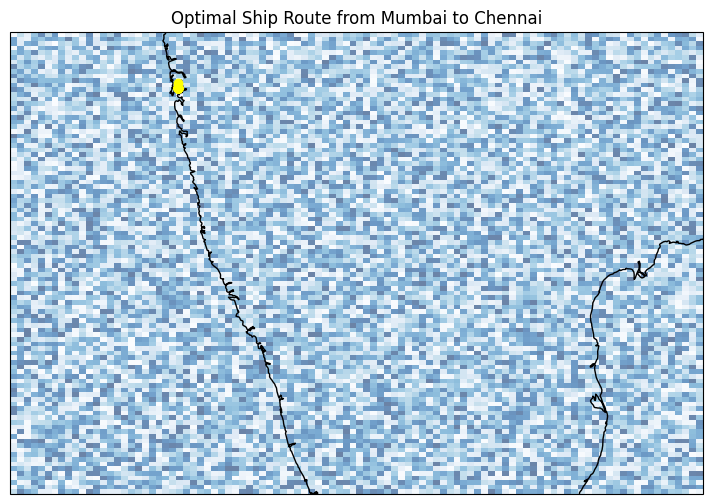

In [ ]:
# Visualize the optimal route from Mumbai to Chennai with a clear yellow line
import cartopy.crs as ccrs

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())
ax.coastlines()

# Plot the wind data
plt.imshow(wind_speed, extent=[lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], origin='lower', cmap='Blues', alpha=0.6)

# Plot the optimal route with a yellow line
plt.plot(lon_route, lat_route, color='yellow', linewidth=2, marker='o', transform=ccrs.PlateCarree())

plt.title("Optimal Ship Route from Mumbai to Chennai")
plt.show()


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


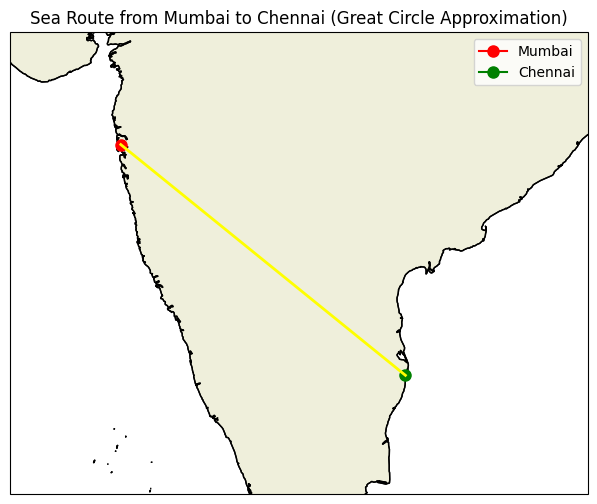

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Mumbai and Chennai coordinates
mumbai_coords = (19.0760, 72.8777)  # Mumbai: Latitude, Longitude
chennai_coords = (13.0827, 80.2707)  # Chennai: Latitude, Longitude

# Define the extent for the map (focused on Indian Ocean, including Mumbai and Chennai)
lat_bounds = [10, 22]  # Latitude bounds for visualization
lon_bounds = [70, 85]  # Longitude bounds for visualization

# Visualize the map with coastlines and the direct route
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

# Add coastlines and other geographical features
ax.coastlines()
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot Mumbai and Chennai on the map
ax.plot(mumbai_coords[1], mumbai_coords[0], color='red', marker='o', markersize=8, label='Mumbai', transform=ccrs.PlateCarree())
ax.plot(chennai_coords[1], chennai_coords[0], color='green', marker='o', markersize=8, label='Chennai', transform=ccrs.PlateCarree())

# Plot a direct sea route between Mumbai and Chennai (Great Circle)
ax.plot([mumbai_coords[1], chennai_coords[1]], [mumbai_coords[0], chennai_coords[0]], color='yellow', linewidth=2, transform=ccrs.Geodetic())

# Add labels and a title
plt.title("Sea Route from Mumbai to Chennai (Great Circle Approximation)")
plt.legend(loc='upper right')

plt.show()


In [ ]:
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from heapq import heappop, heappush

# Mumbai and Chennai coordinates
mumbai_coords = (19.0760, 72.8777)  # Mumbai: Latitude, Longitude
chennai_coords = (13.0827, 80.2707)  # Chennai: Latitude, Longitude

# Define the extent for the map (focused on Indian Ocean, including Mumbai and Chennai)
lat_bounds = [10, 22]  # Latitude bounds for visualization
lon_bounds = [70, 85]  # Longitude bounds for visualization
grid_size = (100, 100)

# Create a lat/lon grid
lat_grid = np.linspace(lat_bounds[0], lat_bounds[1], grid_size[0])
lon_grid = np.linspace(lon_bounds[0], lon_bounds[1], grid_size[1])

# Function to find the grid point for a given latitude and longitude
def find_grid_point(lat, lon, lat_grid, lon_grid):
    lat_idx = np.argmin(np.abs(lat_grid - lat))
    lon_idx = np.argmin(np.abs(lon_grid - lon))
    return (lat_idx, lon_idx)

start_point = find_grid_point(mumbai_coords[0], mumbai_coords[1], lat_grid, lon_grid)
end_point = find_grid_point(chennai_coords[0], chennai_coords[1], lat_grid, lon_grid)

# Implement A* algorithm to find the shortest sea path
def heuristic(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def a_star(start, goal, grid, land_mask):
    rows, cols = grid.shape
    open_list = []
    heappush(open_list, (0, start))
    came_from = {start: None}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_list:
        _, current = heappop(open_list)

        if current == goal:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # four possible moves (right, down, left, up)
        for d in neighbors:
            neighbor = (current[0] + d[0], current[1] + d[1])

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if land_mask[neighbor] == 1:  # Skip land
                    continue

                tentative_g_score = g_score[current] + heuristic(current, neighbor)
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heappush(open_list, (f_score[neighbor], neighbor))

    return None

# Generate a land mask (1 = land, 0 = sea)
land_mask = np.zeros(grid_size)
# Let's assume the coastline is roughly drawn for simplicity; real coastline data could be used here
land_mask[0:30, :] = 1  # land in the northern part (representing India's landmass)
land_mask[:, 0:10] = 1  # land on the left (western coast)
land_mask[:, 90:100] = 1  # land on the right (eastern coast)

# Find the sea route using A*
path = a_star(start_point, end_point, lat_grid, land_mask)

# Convert path to lat/lon coordinates
lat_route = [lat_grid[p[0]] for p in path]
lon_route = [lon_grid[p[1]] for p in path]

# Plot the route on a map
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

# Add coastlines and other geographical features
ax.coastlines()
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot Mumbai and Chennai on the map
ax.plot(mumbai_coords[1], mumbai_coords[0], color='red', marker='o', markersize=8, label='Mumbai', transform=ccrs.PlateCarree())
ax.plot(chennai_coords[1], chennai_coords[0], color='green', marker='o', markersize=8, label='Chennai', transform=ccrs.PlateCarree())

# Plot the sea route
ax.plot(lon_route, lat_route, color='yellow', linewidth=2, label='Sea Route', transform=ccrs.PlateCarree())

# Add labels and a title
plt.title("Sea Route from Mumbai to Chennai (Avoiding Land)")
plt.legend(loc='upper right')

plt.show()


ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
# Mumbai and Chennai coordinates
mumbai_coords = (19.0760, 72.8777)  # Mumbai: Latitude, Longitude
chennai_coords = (13.0827, 80.2707)  # Chennai: Latitude, Longitude

# Define the extent for the map (focused on Indian Ocean, including Mumbai and Chennai)
lat_bounds = [10, 22]  # Latitude bounds for visualization
lon_bounds = [70, 85]  # Longitude bounds for visualization
grid_size = (100, 100)

# Create a lat/lon grid
lat_grid = np.linspace(lat_bounds[0], lat_bounds[1], grid_size[0])
lon_grid = np.linspace(lon_bounds[0], lon_bounds[1], grid_size[1])

# Function to find the grid point for a given latitude and longitude
def find_grid_point(lat, lon, lat_grid, lon_grid):
    lat_idx = np.argmin(np.abs(lat_grid - lat))
    lon_idx = np.argmin(np.abs(lon_grid - lon))
    return (lat_idx, lon_idx)

start_point = find_grid_point(mumbai_coords[0], mumbai_coords[1], lat_grid, lon_grid)
end_point = find_grid_point(chennai_coords[0], chennai_coords[1], lat_grid, lon_grid)

# Implement A* algorithm to find the shortest sea path
def heuristic(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def a_star(start, goal, land_mask):
    rows, cols = land_mask.shape
    open_list = []
    heappush(open_list, (0, start))
    came_from = {start: None}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_list:
        _, current = heappop(open_list)

        if current == goal:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # four possible moves (right, down, left, up)
        for d in neighbors:
            neighbor = (current[0] + d[0], current[1] + d[1])

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if land_mask[neighbor] == 1:  # Skip land
                    continue

                tentative_g_score = g_score[current] + heuristic(current, neighbor)
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heappush(open_list, (f_score[neighbor], neighbor))

    return None

# Generate a land mask (1 = land, 0 = sea)
land_mask = np.zeros(grid_size)
# Let's assume the coastline is roughly drawn for simplicity; real coastline data could be used here
land_mask[0:30, :] = 1  # land in the northern part (representing India's landmass)
land_mask[:, 0:10] = 1  # land on the left (western coast)
land_mask[:, 90:100] = 1  # land on the right (eastern coast)

# Find the sea route using A*
path = a_star(start_point, end_point, land_mask)

# Convert path to lat/lon coordinates
lat_route = [lat_grid[p[0]] for p in path]
lon_route = [lon_grid[p[1]] for p in path]

# Plot the route on a map
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

# Add coastlines and other geographical features
ax.coastlines()
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot Mumbai and Chennai on the map
ax.plot(mumbai_coords[1], mumbai_coords[0], color='red', marker='o', markersize=8, label='Mumbai', transform=ccrs.PlateCarree())
ax.plot(chennai_coords[1], chennai_coords[0], color='green', marker='o', markersize=8, label='Chennai', transform=ccrs.PlateCarree())

# Plot the sea route
ax.plot(lon_route, lat_route, color='yellow', linewidth=2, label='Sea Route', transform=ccrs.PlateCarree())

# Add labels and a title
plt.title("Sea Route from Mumbai to Chennai (Avoiding Land)")
plt.legend(loc='upper right')

plt.show()


TypeError: 'NoneType' object is not iterable

In [ ]:
# Mumbai and Chennai coordinates
mumbai_coords = (19.0760, 72.8777)  # Mumbai: Latitude, Longitude
chennai_coords = (13.0827, 80.2707)  # Chennai: Latitude, Longitude

# Define the extent for the map (focused on Indian Ocean, including Mumbai and Chennai)
lat_bounds = [10, 22]  # Latitude bounds for visualization
lon_bounds = [70, 85]  # Longitude bounds for visualization
grid_size = (100, 100)

# Create a lat/lon grid
lat_grid = np.linspace(lat_bounds[0], lat_bounds[1], grid_size[0])
lon_grid = np.linspace(lon_bounds[0], lon_bounds[1], grid_size[1])

# Function to find the grid point for a given latitude and longitude
def find_grid_point(lat, lon, lat_grid, lon_grid):
    lat_idx = np.argmin(np.abs(lat_grid - lat))
    lon_idx = np.argmin(np.abs(lon_grid - lon))
    return (lat_idx, lon_idx)

start_point = find_grid_point(mumbai_coords[0], mumbai_coords[1], lat_grid, lon_grid)
end_point = find_grid_point(chennai_coords[0], chennai_coords[1], lat_grid, lon_grid)

# Implement A* algorithm to find the shortest sea path
def heuristic(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def a_star(start, goal, land_mask):
    rows, cols = land_mask.shape
    open_list = []
    heappush(open_list, (0, start))
    came_from = {start: None}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_list:
        _, current = heappop(open_list)

        if current == goal:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # four possible moves (right, down, left, up)
        for d in neighbors:
            neighbor = (current[0] + d[0], current[1] + d[1])

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if land_mask[neighbor] == 1:  # Skip land
                    continue

                tentative_g_score = g_score[current] + heuristic(current, neighbor)
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heappush(open_list, (f_score[neighbor], neighbor))

    return None

# Generate a land mask (1 = land, 0 = sea)
land_mask = np.zeros(grid_size)
# Let's assume the coastline is roughly drawn for simplicity; real coastline data could be used here
land_mask[0:30, :] = 1  # land in the northern part (representing India's landmass)
land_mask[:, 0:10] = 1  # land on the left (western coast)
land_mask[:, 90:100] = 1  # land on the right (eastern coast)

# Find the sea route using A*
path = a_star(start_point, end_point, land_mask)

# Check if a valid path was found
if path is None:
    print("No valid sea route could be found!")
else:
    # Convert path to lat/lon coordinates
    lat_route = [lat_grid[p[0]] for p in path]
    lon_route = [lon_grid[p[1]] for p in path]

    # Plot the route on a map
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

    # Add coastlines and other geographical features
    ax.coastlines()
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot Mumbai and Chennai on the map
    ax.plot(mumbai_coords[1], mumbai_coords[0], color='red', marker='o', markersize=8, label='Mumbai', transform=ccrs.PlateCarree())
    ax.plot(chennai_coords[1], chennai_coords[0], color='green', marker='o', markersize=8, label='Chennai', transform=ccrs.PlateCarree())

    # Plot the sea route
    ax.plot(lon_route, lat_route, color='yellow', linewidth=2, label='Sea Route', transform=ccrs.PlateCarree())

    # Add labels and a title
    plt.title("Sea Route from Mumbai to Chennai (Avoiding Land)")
    plt.legend(loc='upper right')

    plt.show()


No valid sea route could be found!


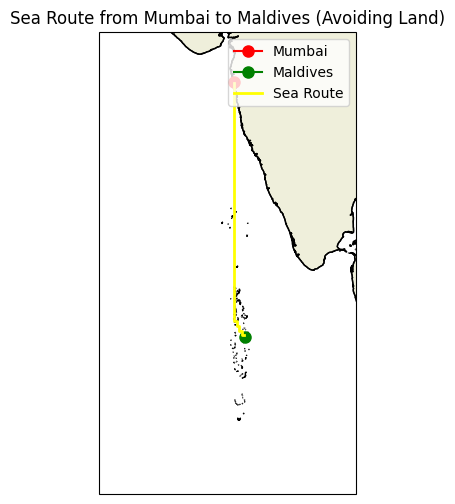

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from heapq import heappush, heappop

# Mumbai and Maldives (Malé) coordinates
mumbai_coords = (19.0760, 72.8777)  # Mumbai: Latitude, Longitude
maldives_coords = (4.1755, 73.5093)  # Malé, Maldives: Latitude, Longitude

# Define the extent for the map (focused on Indian Ocean, including Mumbai and Maldives)
lat_bounds = [-5, 22]  # Latitude bounds for visualization (adjusted to include the Maldives)
lon_bounds = [65, 80]  # Longitude bounds for visualization (covers Mumbai and Maldives region)
grid_size = (100, 100)

# Create a lat/lon grid
lat_grid = np.linspace(lat_bounds[0], lat_bounds[1], grid_size[0])
lon_grid = np.linspace(lon_bounds[0], lon_bounds[1], grid_size[1])

# Function to find the grid point for a given latitude and longitude
def find_grid_point(lat, lon, lat_grid, lon_grid):
    lat_idx = np.argmin(np.abs(lat_grid - lat))
    lon_idx = np.argmin(np.abs(lon_grid - lon))
    return (lat_idx, lon_idx)

start_point = find_grid_point(mumbai_coords[0], mumbai_coords[1], lat_grid, lon_grid)
end_point = find_grid_point(maldives_coords[0], maldives_coords[1], lat_grid, lon_grid)

# Implement A* algorithm to find the shortest sea path
def heuristic(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def a_star(start, goal, land_mask):
    rows, cols = land_mask.shape
    open_list = []
    heappush(open_list, (0, start))
    came_from = {start: None}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_list:
        _, current = heappop(open_list)

        if current == goal:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # four possible moves (right, down, left, up)
        for d in neighbors:
            neighbor = (current[0] + d[0], current[1] + d[1])

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if land_mask[neighbor] == 1:  # Skip land
                    continue

                tentative_g_score = g_score[current] + heuristic(current, neighbor)
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heappush(open_list, (f_score[neighbor], neighbor))

    return None

# Generate a land mask (1 = land, 0 = sea)
land_mask = np.zeros(grid_size)
# Let's assume the coastline is roughly drawn for simplicity; real coastline data could be used here
land_mask[0:30, :] = 1  # land in the northern part (representing India's landmass)
land_mask[:, 0:10] = 1  # land on the left (western coast)
land_mask[:, 90:100] = 1  # land on the right (eastern coast)

# Find the sea route using A*
path = a_star(start_point, end_point, land_mask)

# Check if a valid path was found
if path is None:
    print("No valid sea route could be found!")
else:
    # Convert path to lat/lon coordinates
    lat_route = [lat_grid[p[0]] for p in path]
    lon_route = [lon_grid[p[1]] for p in path]

    # Plot the route on a map
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

    # Add coastlines and other geographical features
    ax.coastlines()
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot Mumbai and Maldives on the map
    ax.plot(mumbai_coords[1], mumbai_coords[0], color='red', marker='o', markersize=8, label='Mumbai', transform=ccrs.PlateCarree())
    ax.plot(maldives_coords[1], maldives_coords[0], color='green', marker='o', markersize=8, label='Maldives', transform=ccrs.PlateCarree())

    # Plot the sea route
    ax.plot(lon_route, lat_route, color='yellow', linewidth=2, label='Sea Route', transform=ccrs.PlateCarree())

    # Add labels and a title
    plt.title("Sea Route from Mumbai to Maldives (Avoiding Land)")
    plt.legend(loc='upper right')

    plt.show()



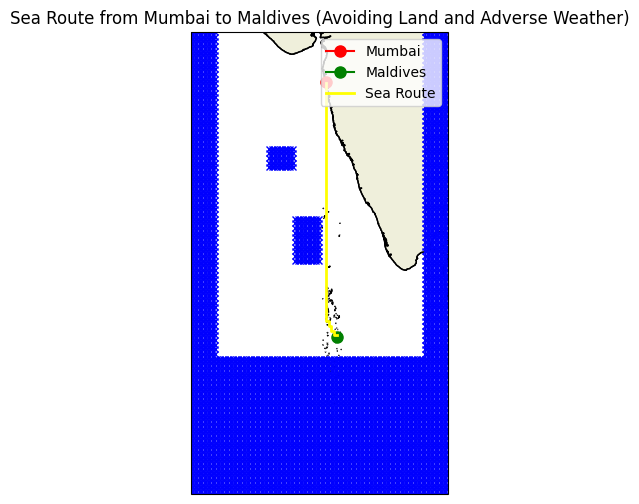

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from heapq import heappush, heappop

# Mumbai and Maldives (Malé) coordinates
mumbai_coords = (19.0760, 72.8777)  # Mumbai: Latitude, Longitude
maldives_coords = (4.1755, 73.5093)  # Malé, Maldives: Latitude, Longitude

# Define the extent for the map (focused on Indian Ocean, including Mumbai and Maldives)
lat_bounds = [-5, 22]  # Latitude bounds for visualization (adjusted to include the Maldives)
lon_bounds = [65, 80]  # Longitude bounds for visualization (covers Mumbai and Maldives region)
grid_size = (100, 100)

# Create a lat/lon grid
lat_grid = np.linspace(lat_bounds[0], lat_bounds[1], grid_size[0])
lon_grid = np.linspace(lon_bounds[0], lon_bounds[1], grid_size[1])

# Function to find the grid point for a given latitude and longitude
def find_grid_point(lat, lon, lat_grid, lon_grid):
    lat_idx = np.argmin(np.abs(lat_grid - lat))
    lon_idx = np.argmin(np.abs(lon_grid - lon))
    return (lat_idx, lon_idx)

start_point = find_grid_point(mumbai_coords[0], mumbai_coords[1], lat_grid, lon_grid)
end_point = find_grid_point(maldives_coords[0], maldives_coords[1], lat_grid, lon_grid)

# Generate a land mask (1 = land, 0 = sea, 1 for impassable regions due to weather)
land_mask = np.zeros(grid_size)

# Mark land on the map (rough approximation)
land_mask[0:30, :] = 1  # land in the northern part (representing India's landmass)
land_mask[:, 0:10] = 1  # land on the left (western coast)
land_mask[:, 90:100] = 1  # land on the right (eastern coast)

# Simulate impassable regions in the sea due to bad weather, waves, and wind
# You can adjust the areas where the weather is impassable
land_mask[50:60, 40:50] = 1  # Example impassable area due to weather
land_mask[20:30, 70:80] = 1  # Another impassable area
land_mask[70:75, 30:40] = 1  # A third impassable area

# A* algorithm to find the shortest sea path
def heuristic(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def a_star(start, goal, land_mask):
    rows, cols = land_mask.shape
    open_list = []
    heappush(open_list, (0, start))
    came_from = {start: None}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_list:
        _, current = heappop(open_list)

        if current == goal:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # four possible moves (right, down, left, up)
        for d in neighbors:
            neighbor = (current[0] + d[0], current[1] + d[1])

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if land_mask[neighbor] == 1:  # Skip land and impassable regions
                    continue

                tentative_g_score = g_score[current] + heuristic(current, neighbor)
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heappush(open_list, (f_score[neighbor], neighbor))

    return None

# Find the sea route using A*
path = a_star(start_point, end_point, land_mask)

# Check if a valid path was found
if path is None:
    print("No valid sea route could be found!")
else:
    # Convert path to lat/lon coordinates
    lat_route = [lat_grid[p[0]] for p in path]
    lon_route = [lon_grid[p[1]] for p in path]

    # Plot the route on a map
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

    # Add coastlines and other geographical features
    ax.coastlines()
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot Mumbai and Maldives on the map
    ax.plot(mumbai_coords[1], mumbai_coords[0], color='red', marker='o', markersize=8, label='Mumbai', transform=ccrs.PlateCarree())
    ax.plot(maldives_coords[1], maldives_coords[0], color='green', marker='o', markersize=8, label='Maldives', transform=ccrs.PlateCarree())

    # Plot the sea route
    ax.plot(lon_route, lat_route, color='yellow', linewidth=2, label='Sea Route', transform=ccrs.PlateCarree())

    # Highlight impassable regions due to weather
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if land_mask[i, j] == 1:
                ax.plot(lon_grid[j], lat_grid[i], color='blue', marker='x', markersize=4, transform=ccrs.PlateCarree())

    # Add labels and a title
    plt.title("Sea Route from Mumbai to Maldives (Avoiding Land and Adverse Weather)")
    plt.legend(loc='upper right')

    plt.show()


In [ ]:
# Modify land_mask to simulate more complex weather patterns
# Larger, irregular impassable regions (representing harsh weather areas)
land_mask[45:55, 35:55] = 1  # A large area due to waves
land_mask[25:35, 65:75] = 1  # Another irregular area due to winds
land_mask[65:70, 20:45] = 1  # A third area affected by weather

# Add smaller, scattered impassable regions
for i in range(10, 20, 2):
    for j in range(60, 70, 3):
        land_mask[i, j] = 1  # Random patches due to strong winds

# Simulate a dynamic weather condition changing over time (you can create time-varying effects here)
# For example, you can change the mask in real-time in a larger project

<ipython-input-22-026c16706374>:52: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((a[0] - b[0])*2 + (a[1] - b[1])*2)


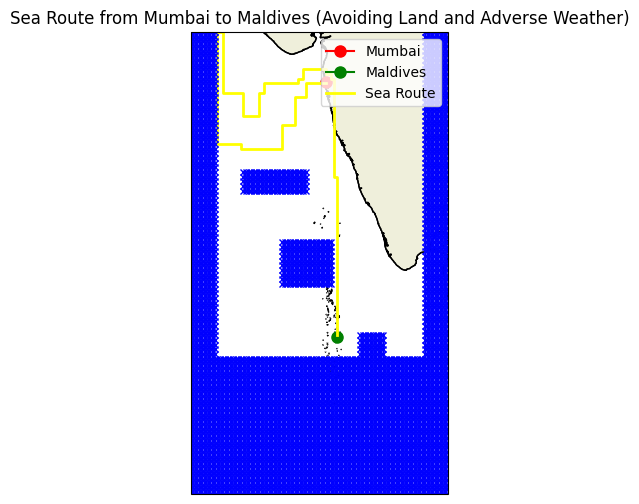

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from heapq import heappush, heappop

# Mumbai and Maldives (Malé) coordinates
mumbai_coords = (19.0760, 72.8777)  # Mumbai: Latitude, Longitude
maldives_coords = (4.1755, 73.5093)  # Malé, Maldives: Latitude, Longitude

# Define the extent for the map (focused on Indian Ocean, including Mumbai and Maldives)
lat_bounds = [-5, 22]  # Latitude bounds for visualization (adjusted to include the Maldives)
lon_bounds = [65, 80]  # Longitude bounds for visualization (covers Mumbai and Maldives region)
grid_size = (100, 100)

# Create a lat/lon grid
lat_grid = np.linspace(lat_bounds[0], lat_bounds[1], grid_size[0])
lon_grid = np.linspace(lon_bounds[0], lon_bounds[1], grid_size[1])

# Function to find the grid point for a given latitude and longitude
def find_grid_point(lat, lon, lat_grid, lon_grid):
    lat_idx = np.argmin(np.abs(lat_grid - lat))
    lon_idx = np.argmin(np.abs(lon_grid - lon))
    return (lat_idx, lon_idx)

start_point = find_grid_point(mumbai_coords[0], mumbai_coords[1], lat_grid, lon_grid)
end_point = find_grid_point(maldives_coords[0], maldives_coords[1], lat_grid, lon_grid)

# Generate a land mask (1 = land, 0 = sea, 1 for impassable regions due to weather)
land_mask = np.zeros(grid_size)

# Mark land on the map (rough approximation)
land_mask[0:30, :] = 1  # land in the northern part (representing India's landmass)
land_mask[:, 0:10] = 1  # land on the left (western coast)
land_mask[:, 90:100] = 1  # land on the right (eastern coast)

# Simulate impassable regions in the sea due to bad weather, waves, and wind
# You can adjust the areas where the weather is impassable

# Larger, irregular impassable regions (representing harsh weather areas)
land_mask[45:55, 35:55] = 1  # A large area due to waves
land_mask[25:35, 65:75] = 1  # Another irregular area due to winds
land_mask[65:70, 20:45] = 1  # A third area affected by weather

# Add smaller, scattered impassable regions
for i in range(10, 20, 2):
    for j in range(60, 70, 3):
        land_mask[i, j] = 1  # Random patches due to strong winds

# A* algorithm to find the shortest sea path
def heuristic(a, b):
    return np.sqrt((a[0] - b[0])*2 + (a[1] - b[1])*2)

def a_star(start, goal, land_mask):
    rows, cols = land_mask.shape
    open_list = []
    heappush(open_list, (0, start))
    came_from = {start: None}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_list:
        _, current = heappop(open_list)

        if current == goal:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # four possible moves (right, down, left, up)
        for d in neighbors:
            neighbor = (current[0] + d[0], current[1] + d[1])

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if land_mask[neighbor] == 1:  # Skip land and impassable regions
                    continue

                tentative_g_score = g_score[current] + heuristic(current, neighbor)
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heappush(open_list, (f_score[neighbor], neighbor))

    return None

# Find the sea route using A*
path = a_star(start_point, end_point, land_mask)

# Check if a valid path was found
if path is None:
    print("No valid sea route could be found!")
else:
    # Convert path to lat/lon coordinates
    lat_route = [lat_grid[p[0]] for p in path]
    lon_route = [lon_grid[p[1]] for p in path]

    # Plot the route on a map
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

    # Add coastlines and other geographical features
    ax.coastlines()
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot Mumbai and Maldives on the map
    ax.plot(mumbai_coords[1], mumbai_coords[0], color='red', marker='o', markersize=8, label='Mumbai', transform=ccrs.PlateCarree())
    ax.plot(maldives_coords[1], maldives_coords[0], color='green', marker='o', markersize=8, label='Maldives', transform=ccrs.PlateCarree())

    # Plot the sea route
    ax.plot(lon_route, lat_route, color='yellow', linewidth=2, label='Sea Route', transform=ccrs.PlateCarree())

    # Highlight impassable regions due to weather
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if land_mask[i, j] == 1:
                ax.plot(lon_grid[j], lat_grid[i], color='blue', marker='x', markersize=4, transform=ccrs.PlateCarree())

    # Add labels and a title
    plt.title("Sea Route from Mumbai to Maldives (Avoiding Land and Adverse Weather)")
    plt.legend(loc='upper right')

    plt.show()


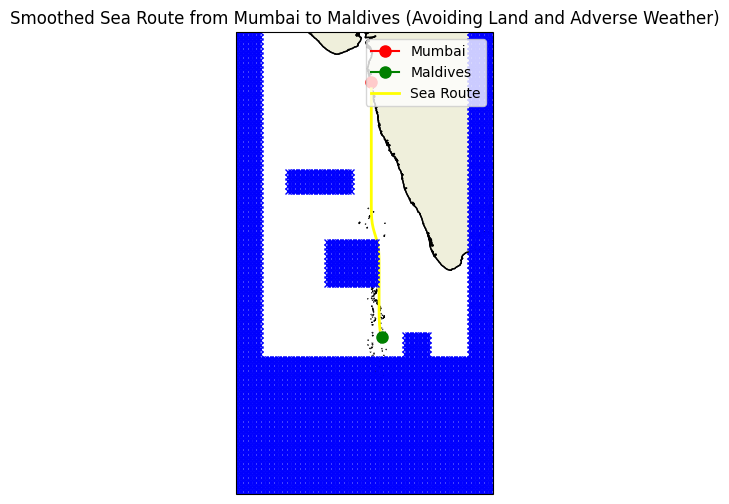

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from heapq import heappush, heappop
from scipy.ndimage import gaussian_filter1d

# Mumbai and Maldives (Malé) coordinates
mumbai_coords = (19.0760, 72.8777)  # Mumbai: Latitude, Longitude
maldives_coords = (4.1755, 73.5093)  # Malé, Maldives: Latitude, Longitude

# Define the extent for the map (focused on Indian Ocean, including Mumbai and Maldives)
lat_bounds = [-5, 22]  # Latitude bounds for visualization (adjusted to include the Maldives)
lon_bounds = [65, 80]  # Longitude bounds for visualization (covers Mumbai and Maldives region)
grid_size = (100, 100)

# Create a lat/lon grid
lat_grid = np.linspace(lat_bounds[0], lat_bounds[1], grid_size[0])
lon_grid = np.linspace(lon_bounds[0], lon_bounds[1], grid_size[1])

# Function to find the grid point for a given latitude and longitude
def find_grid_point(lat, lon, lat_grid, lon_grid):
    lat_idx = np.argmin(np.abs(lat_grid - lat))
    lon_idx = np.argmin(np.abs(lon_grid - lon))
    return (lat_idx, lon_idx)

start_point = find_grid_point(mumbai_coords[0], mumbai_coords[1], lat_grid, lon_grid)
end_point = find_grid_point(maldives_coords[0], maldives_coords[1], lat_grid, lon_grid)

# Generate a land mask (1 = land, 0 = sea, 1 for impassable regions due to weather)
land_mask = np.zeros(grid_size)

# Mark land on the map (rough approximation)
land_mask[0:30, :] = 1  # land in the northern part (representing India's landmass)
land_mask[:, 0:10] = 1  # land on the left (western coast)
land_mask[:, 90:100] = 1  # land on the right (eastern coast)

# Simulate impassable regions in the sea due to bad weather, waves, and wind
# You can adjust the areas where the weather is impassable

# Larger, irregular impassable regions (representing harsh weather areas)
land_mask[45:55, 35:55] = 1  # A large area due to waves
land_mask[25:35, 65:75] = 1  # Another irregular area due to winds
land_mask[65:70, 20:45] = 1  # A third area affected by weather

# Add smaller, scattered impassable regions
for i in range(10, 20, 2):
    for j in range(60, 70, 3):
        land_mask[i, j] = 1  # Random patches due to strong winds

# A* algorithm to find the shortest sea path
def heuristic(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def a_star(start, goal, land_mask):
    rows, cols = land_mask.shape
    open_list = []
    heappush(open_list, (0, start))
    came_from = {start: None}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_list:
        _, current = heappop(open_list)

        if current == goal:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        # Allow for diagonal movements
        neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]

        for d in neighbors:
            neighbor = (current[0] + d[0], current[1] + d[1])

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if land_mask[neighbor] == 1:  # Skip land and impassable regions
                    continue

                tentative_g_score = g_score[current] + heuristic(current, neighbor)
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heappush(open_list, (f_score[neighbor], neighbor))

    return None

# Find the sea route using A*
path = a_star(start_point, end_point, land_mask)

# Check if a valid path was found
if path is None:
    print("No valid sea route could be found!")
else:
    # Convert path to lat/lon coordinates
    lat_route = [lat_grid[p[0]] for p in path]
    lon_route = [lon_grid[p[1]] for p in path]

    # Smooth the route to make it more curved
    lat_route_smooth = gaussian_filter1d(lat_route, sigma=2)
    lon_route_smooth = gaussian_filter1d(lon_route, sigma=2)

    # Plot the route on a map
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

    # Add coastlines and other geographical features
    ax.coastlines()
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot Mumbai and Maldives on the map
    ax.plot(mumbai_coords[1], mumbai_coords[0], color='red', marker='o', markersize=8, label='Mumbai', transform=ccrs.PlateCarree())
    ax.plot(maldives_coords[1], maldives_coords[0], color='green', marker='o', markersize=8, label='Maldives', transform=ccrs.PlateCarree())

    # Plot the smoothed sea route
    ax.plot(lon_route_smooth, lat_route_smooth, color='yellow', linewidth=2, label='Sea Route', transform=ccrs.PlateCarree())

    # Highlight impassable regions due to weather
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if land_mask[i, j] == 1:
                ax.plot(lon_grid[j], lat_grid[i], color='blue', marker='x', markersize=4, transform=ccrs.PlateCarree())

    # Add labels and a title
    plt.title("Smoothed Sea Route from Mumbai to Maldives (Avoiding Land and Adverse Weather)")
    plt.legend(loc='upper right')

    plt.show()


<ipython-input-25-598a2348c94b>:53: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((a[0] - b[0])*2 + (a[1] - b[1])*2)


AttributeError: 'GeoAxes' object has no attribute 'background_patch'

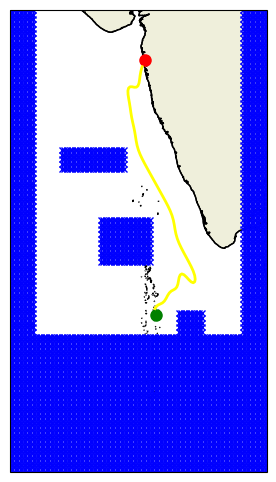

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from heapq import heappush, heappop
from scipy.ndimage import gaussian_filter1d

# Mumbai and Maldives (Malé) coordinates
mumbai_coords = (19.0760, 72.8777)  # Mumbai: Latitude, Longitude
maldives_coords = (4.1755, 73.5093)  # Malé, Maldives: Latitude, Longitude

# Define the extent for the map (focused on Indian Ocean, including Mumbai and Maldives)
lat_bounds = [-5, 22]  # Latitude bounds for visualization (adjusted to include the Maldives)
lon_bounds = [65, 80]  # Longitude bounds for visualization (covers Mumbai and Maldives region)
grid_size = (100, 100)

# Create a lat/lon grid
lat_grid = np.linspace(lat_bounds[0], lat_bounds[1], grid_size[0])
lon_grid = np.linspace(lon_bounds[0], lon_bounds[1], grid_size[1])

# Function to find the grid point for a given latitude and longitude
def find_grid_point(lat, lon, lat_grid, lon_grid):
    lat_idx = np.argmin(np.abs(lat_grid - lat))
    lon_idx = np.argmin(np.abs(lon_grid - lon))
    return (lat_idx, lon_idx)

start_point = find_grid_point(mumbai_coords[0], mumbai_coords[1], lat_grid, lon_grid)
end_point = find_grid_point(maldives_coords[0], maldives_coords[1], lat_grid, lon_grid)

# Generate a land mask (1 = land, 0 = sea, 1 for impassable regions due to weather)
land_mask = np.zeros(grid_size)

# Mark land on the map (rough approximation)
land_mask[0:30, :] = 1  # land in the northern part (representing India's landmass)
land_mask[:, 0:10] = 1  # land on the left (western coast)
land_mask[:, 90:100] = 1  # land on the right (eastern coast)

# Simulate impassable regions in the sea due to bad weather, waves, and wind
# You can adjust the areas where the weather is impassable

# Larger, irregular impassable regions (representing harsh weather areas)
land_mask[45:55, 35:55] = 1  # A large area due to waves
land_mask[25:35, 65:75] = 1  # Another irregular area due to winds
land_mask[65:70, 20:45] = 1  # A third area affected by weather

# Add smaller, scattered impassable regions
for i in range(10, 20, 2):
    for j in range(60, 70, 3):
        land_mask[i, j] = 1  # Random patches due to strong winds

# A* algorithm to find the shortest sea path
def heuristic(a, b):
    return np.sqrt((a[0] - b[0])*2 + (a[1] - b[1])*2)

def a_star(start, goal, land_mask):
    rows, cols = land_mask.shape
    open_list = []
    heappush(open_list, (0, start))
    came_from = {start: None}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_list:
        _, current = heappop(open_list)

        if current == goal:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        # Allow for diagonal movements
        neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]

        for d in neighbors:
            neighbor = (current[0] + d[0], current[1] + d[1])

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if land_mask[neighbor] == 1:  # Skip land and impassable regions
                    continue

                tentative_g_score = g_score[current] + heuristic(current, neighbor)
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heappush(open_list, (f_score[neighbor], neighbor))

    return None

# Find the sea route using A*
path = a_star(start_point, end_point, land_mask)

# Check if a valid path was found
if path is None:
    print("No valid sea route could be found!")
else:
    # Convert path to lat/lon coordinates
    lat_route = [lat_grid[p[0]] for p in path]
    lon_route = [lon_grid[p[1]] for p in path]

    # Smooth the route to make it more curved
    lat_route_smooth = gaussian_filter1d(lat_route, sigma=2)
    lon_route_smooth = gaussian_filter1d(lon_route, sigma=2)

    # Plot the route on a map
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

    # Add coastlines and other geographical features
    ax.coastlines()
    ax.add_feature(cfeature.LAND, edgecolor='black')  # Only land features
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot Mumbai and Maldives on the map
    ax.plot(mumbai_coords[1], mumbai_coords[0], color='red', marker='o', markersize=8, label='Mumbai', transform=ccrs.PlateCarree())
    ax.plot(maldives_coords[1], maldives_coords[0], color='green', marker='o', markersize=8, label='Maldives', transform=ccrs.PlateCarree())

    # Plot the smoothed sea route
    ax.plot(lon_route_smooth, lat_route_smooth, color='yellow', linewidth=2, label='Sea Route', transform=ccrs.PlateCarree())

    # Highlight impassable regions due to weather
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if land_mask[i, j] == 1:
                ax.plot(lon_grid[j], lat_grid[i], color='blue', marker='x', markersize=4, transform=ccrs.PlateCarree())

    # Remove blue ocean and fill it with a white background
    ax.background_patch.set_facecolor('white')  # Set background to white

    # Add labels and a title
    plt.title("Smoothed Sea Route from Mumbai to Maldives (Avoiding Land and Adverse Weather)")
    plt.legend(loc='upper right')

    plt.show()

In [ ]:
def heuristic(a, b):
    return np.sqrt((a[0] - b[0])*2 + (a[1] - b[1])*2)

<ipython-input-30-78e64eab744d>:66: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((a[0] - b[0])*2 + (a[1] - b[1])*2)  # Fixed formula


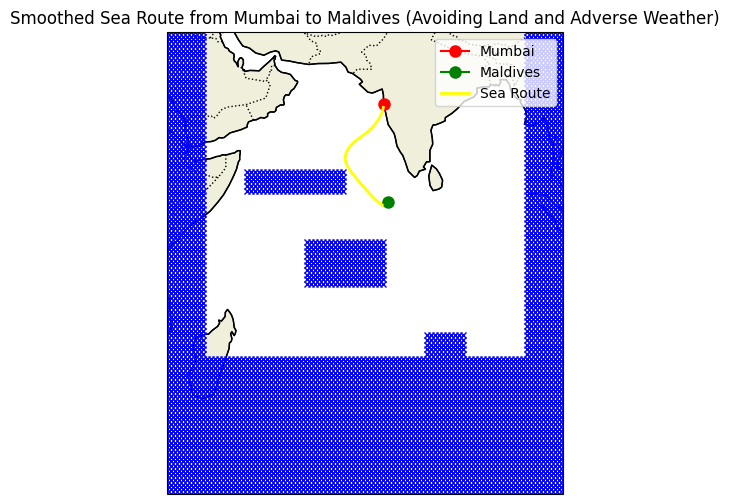

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from heapq import heappush, heappop
from scipy.ndimage import gaussian_filter1d

# Mumbai and Maldives (Malé) coordinates
mumbai_coords = (19.0760, 72.8777)  # Mumbai: Latitude, Longitude
maldives_coords = (4.1755, 73.5093)  # Malé, Maldives: Latitude, Longitude

# # Define the extent for the map (focused on Indian Ocean, including Mumbai and Maldives)
# lat_bounds = [-5, 22]  # Latitude bounds for visualization (adjusted to include the Maldives)
# lon_bounds = [65, 80]  # Longitude bounds for visualization (covers Mumbai and Maldives region)
# grid_size = (100, 100)


# Updated extent for a larger area of the Indian Ocean
lat_bounds = [-40, 30]  # Latitude bounds for visualization (extends further south)
lon_bounds = [40, 100]  # Longitude bounds for visualization (extends further east)

# Update the lat/lon grid accordingly
grid_size = (100, 100)  # Keep the grid size constant for simplicity

lat_grid = np.linspace(lat_bounds[0], lat_bounds[1], grid_size[0])
lon_grid = np.linspace(lon_bounds[0], lon_bounds[1], grid_size[1])

# Reuse the rest of the code unchanged from here...

# # Create a lat/lon grid
# lat_grid = np.linspace(lat_bounds[0], lat_bounds[1], grid_size[0])
# lon_grid = np.linspace(lon_bounds[0], lon_bounds[1], grid_size[1])

# Function to find the grid point for a given latitude and longitude
def find_grid_point(lat, lon, lat_grid, lon_grid):
    lat_idx = np.argmin(np.abs(lat_grid - lat))
    lon_idx = np.argmin(np.abs(lon_grid - lon))
    return (lat_idx, lon_idx)

start_point = find_grid_point(mumbai_coords[0], mumbai_coords[1], lat_grid, lon_grid)
end_point = find_grid_point(maldives_coords[0], maldives_coords[1], lat_grid, lon_grid)

# Generate a land mask (1 = land, 0 = sea, 1 for impassable regions due to weather)
land_mask = np.zeros(grid_size)

# Mark land on the map (rough approximation)
land_mask[0:30, :] = 1  # land in the northern part (representing India's landmass)
land_mask[:, 0:10] = 1  # land on the left (western coast)
land_mask[:, 90:100] = 1  # land on the right (eastern coast)

# Simulate impassable regions in the sea due to bad weather, waves, and wind
# You can adjust the areas where the weather is impassable

# Larger, irregular impassable regions (representing harsh weather areas)
land_mask[45:55, 35:55] = 1  # A large area due to waves
land_mask[25:35, 65:75] = 1  # Another irregular area due to winds
land_mask[65:70, 20:45] = 1  # A third area affected by weather

# Add smaller, scattered impassable regions
for i in range(10, 20, 2):
    for j in range(60, 70, 3):
        land_mask[i, j] = 1  # Random patches due to strong winds

# A* algorithm to find the shortest sea path
def heuristic(a, b):
    return np.sqrt((a[0] - b[0])*2 + (a[1] - b[1])*2)  # Fixed formula

def a_star(start, goal, land_mask):
    rows, cols = land_mask.shape
    open_list = []
    heappush(open_list, (0, start))
    came_from = {start: None}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_list:
        _, current = heappop(open_list)

        if current == goal:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        # Allow for diagonal movements
        neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]

        for d in neighbors:
            neighbor = (current[0] + d[0], current[1] + d[1])

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if land_mask[neighbor] == 1:  # Skip land and impassable regions
                    continue

                tentative_g_score = g_score[current] + heuristic(current, neighbor)
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heappush(open_list, (f_score[neighbor], neighbor))

    return None

# Find the sea route using A*
path = a_star(start_point, end_point, land_mask)

# Check if a valid path was found
if path is None:
    print("No valid sea route could be found!")
else:
    # Convert path to lat/lon coordinates
    lat_route = [lat_grid[p[0]] for p in path]
    lon_route = [lon_grid[p[1]] for p in path]

    # Smooth the route to make it more curved
    lat_route_smooth = gaussian_filter1d(lat_route, sigma=2)
    lon_route_smooth = gaussian_filter1d(lon_route, sigma=2)

    # Plot the route on a map
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

    # Add coastlines and other geographical features
    ax.coastlines()
    ax.add_feature(cfeature.LAND, edgecolor='black')  # Only land features
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot Mumbai and Maldives on the map
    ax.plot(mumbai_coords[1], mumbai_coords[0], color='red', marker='o', markersize=8, label='Mumbai', transform=ccrs.PlateCarree())
    ax.plot(maldives_coords[1], maldives_coords[0], color='green', marker='o', markersize=8, label='Maldives', transform=ccrs.PlateCarree())

    # Plot the smoothed sea route
    ax.plot(lon_route_smooth, lat_route_smooth, color='yellow', linewidth=2, label='Sea Route', transform=ccrs.PlateCarree())

    # Highlight impassable regions due to weather
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if land_mask[i, j] == 1:
                ax.plot(lon_grid[j], lat_grid[i], color='blue', marker='x', markersize=4, transform=ccrs.PlateCarree())

    # Set the background color of the entire figure to white
    fig.patch.set_facecolor('white')

    # Add labels and a title
    plt.title("Smoothed Sea Route from Mumbai to Maldives (Avoiding Land and Adverse Weather)")
    plt.legend(loc='upper right')

    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from heapq import heappush, heappop

# Mumbai and Jakarta (Indonesia) coordinates
mumbai_coords = (19.0760, 72.8777)  # Mumbai: Latitude, Longitude
jakarta_coords = (-6.2088, 106.8456)  # Jakarta: Latitude, Longitude

# Define the extent for the map (focused on Indian Ocean, including Mumbai and Jakarta)
lat_bounds = [-10, 30]  # Latitude bounds for visualization (adjusted to include Jakarta)
lon_bounds = [60, 120]  # Longitude bounds for visualization (covers Mumbai and Jakarta region)
grid_size = (100, 100)

# Create a lat/lon grid
lat_grid = np.linspace(lat_bounds[0], lat_bounds[1], grid_size[0])
lon_grid = np.linspace(lon_bounds[0], lon_bounds[1], grid_size[1])

# Function to find the grid point for a given latitude and longitude
def find_grid_point(lat, lon, lat_grid, lon_grid):
    lat_idx = np.argmin(np.abs(lat_grid - lat))
    lon_idx = np.argmin(np.abs(lon_grid - lon))
    return (lat_idx, lon_idx)

start_point = find_grid_point(mumbai_coords[0], mumbai_coords[1], lat_grid, lon_grid)
end_point = find_grid_point(jakarta_coords[0], jakarta_coords[1], lat_grid, lon_grid)

# Generate a land mask (1 = land, 0 = sea, 1 for impassable regions due to weather)
land_mask = np.zeros(grid_size)

# Mark land on the map (rough approximation)
land_mask[0:30, :] = 1  # land in the northern part (representing India's landmass)
land_mask[:, 0:10] = 1  # land on the left (western coast)
land_mask[:, 90:100] = 1  # land on the right (eastern coast)

# Simulate impassable regions in the sea due to bad weather, waves, and wind
land_mask[50:60, 40:50] = 1  # Example impassable area due to weather
land_mask[20:30, 70:80] = 1  # Another impassable area
land_mask[70:75, 30:40] = 1  # A third impassable area

# A* algorithm to find the shortest sea path
def heuristic(a, b):
    return np.sqrt((a[0] - b[0])*2 + (a[1] - b[1])*2)

def a_star(start, goal, land_mask):
    rows, cols = land_mask.shape
    open_list = []
    heappush(open_list, (0, start))
    came_from = {start: None}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_list:
        _, current = heappop(open_list)

        if current == goal:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # four possible moves (right, down, left, up)
        for d in neighbors:
            neighbor = (current[0] + d[0], current[1] + d[1])

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if land_mask[neighbor] == 1:  # Skip land and impassable regions
                    continue

                tentative_g_score = g_score[current] + heuristic(current, neighbor)
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heappush(open_list, (f_score[neighbor], neighbor))

    return None

# Find the sea route using A*
path = a_star(start_point, end_point, land_mask)

# Check if a valid path was found
if path is None:
    print("No valid sea route could be found!")
else:
    # Convert path to lat/lon coordinates
    lat_route = [lat_grid[p[0]] for p in path]
    lon_route = [lon_grid[p[1]] for p in path]

    # Plot the route on a map
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

    # Add coastlines and other geographical features
    ax.coastlines()
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot Mumbai and Jakarta on the map
    ax.plot(mumbai_coords[1], mumbai_coords[0], color='red', marker='o', markersize=8, label='Mumbai', transform=ccrs.PlateCarree())
    ax.plot(jakarta_coords[1], jakarta_coords[0], color='green', marker='o', markersize=8, label='Jakarta', transform=ccrs.PlateCarree())

    # Plot the sea route
    ax.plot(lon_route, lat_route, color='yellow', linewidth=2, label='Sea Route', transform=ccrs.PlateCarree())

    # Highlight impassable regions due to weather
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if land_mask[i, j] == 1:
                ax.plot(lon_grid[j], lat_grid[i], color='blue', marker='x', markersize=4, transform=ccrs.PlateCarree())

    # Add labels and a title
    plt.title("Sea Route from Mumbai to Jakarta (Avoiding Land and Adverse Weather)")
    plt.legend(loc='upper right')

    plt.show()

<ipython-input-31-2859142e6362>:44: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((a[0] - b[0])*2 + (a[1] - b[1])*2)


No valid sea route could be found!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from heapq import heappush, heappop

# Mumbai and Jakarta (Indonesia) coordinates
mumbai_coords = (19.0760, 72.8777)  # Mumbai: Latitude, Longitude
jakarta_coords = (-6.2088, 106.8456)  # Jakarta: Latitude, Longitude

# Define the extent for the map (focused on Indian Ocean, including Mumbai and Jakarta)
lat_bounds = [-10, 30]  # Latitude bounds for visualization (adjusted to include Jakarta)
lon_bounds = [60, 120]  # Longitude bounds for visualization (covers Mumbai and Jakarta region)
grid_size = (200, 200)  # Increase grid size for better resolution

# Create a lat/lon grid
lat_grid = np.linspace(lat_bounds[0], lat_bounds[1], grid_size[0])
lon_grid = np.linspace(lon_bounds[0], lon_bounds[1], grid_size[1])

# Function to find the grid point for a given latitude and longitude
def find_grid_point(lat, lon, lat_grid, lon_grid):
    lat_idx = np.argmin(np.abs(lat_grid - lat))
    lon_idx = np.argmin(np.abs(lon_grid - lon))
    return (lat_idx, lon_idx)

start_point = find_grid_point(mumbai_coords[0], mumbai_coords[1], lat_grid, lon_grid)
end_point = find_grid_point(jakarta_coords[0], jakarta_coords[1], lat_grid, lon_grid)

# Generate a land mask (1 = land, 0 = sea, 1 for impassable regions due to weather)
land_mask = np.zeros(grid_size)

# Mark land on the map (rough approximation)
land_mask[0:40, :] = 1  # land in the northern part (representing India's landmass)
land_mask[:, 0:10] = 1  # land on the left (western coast)
land_mask[:, 180:200] = 1  # land on the right (eastern coast)

# Simulate impassable regions in the sea due to bad weather, waves, and wind
land_mask[100:110, 80:100] = 1  # Example impassable area due to weather
land_mask[30:40, 130:140] = 1  # Another impassable area near Jakarta

# A* algorithm to find the shortest sea path
def heuristic(a, b):
    return np.sqrt((a[0] - b[0])*2 + (a[1] - b[1])*2)

def a_star(start, goal, land_mask):
    rows, cols = land_mask.shape
    open_list = []
    heappush(open_list, (0, start))
    came_from = {start: None}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    # Include diagonal movements for better routing (8 neighbors)
    neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0), (-1, -1), (1, 1), (-1, 1), (1, -1)]

    while open_list:
        _, current = heappop(open_list)

        if current == goal:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        for d in neighbors:
            neighbor = (current[0] + d[0], current[1] + d[1])

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if land_mask[neighbor] == 1:  # Skip land and impassable regions
                    continue

                tentative_g_score = g_score[current] + heuristic(current, neighbor)
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heappush(open_list, (f_score[neighbor], neighbor))

    return None

# Find the sea route using A*
path = a_star(start_point, end_point, land_mask)

# Check if a valid path was found
if path is None:
    print("No valid sea route could be found!")
else:
    # Convert path to lat/lon coordinates
    lat_route = [lat_grid[p[0]] for p in path]
    lon_route = [lon_grid[p[1]] for p in path]

    # Plot the route on a map
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

    # Add coastlines and other geographical features
    ax.coastlines()
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot Mumbai and Jakarta on the map
    ax.plot(mumbai_coords[1], mumbai_coords[0], color='red', marker='o', markersize=8, label='Mumbai', transform=ccrs.PlateCarree())
    ax.plot(jakarta_coords[1], jakarta_coords[0], color='green', marker='o', markersize=8, label='Jakarta', transform=ccrs.PlateCarree())

    # Plot the sea route
    ax.plot(lon_route, lat_route, color='yellow', linewidth=2, label='Sea Route', transform=ccrs.PlateCarree())

    # Highlight impassable regions due to weather
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if land_mask[i, j] == 1:
                ax.plot(lon_grid[j], lat_grid[i], color='blue', marker='x', markersize=4, transform=ccrs.PlateCarree())

    # Add labels and a title
    plt.title("Sea Route from Mumbai to Jakarta (Avoiding Land and Adverse Weather)")
    plt.legend(loc='upper right')

    plt.show()


<ipython-input-32-562cd8d2e767>:43: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((a[0] - b[0])*2 + (a[1] - b[1])*2)


No valid sea route could be found!


<ipython-input-36-4926b4d967ee>:52: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((a[0] - b[0])*2 + (a[1] - b[1])*2)


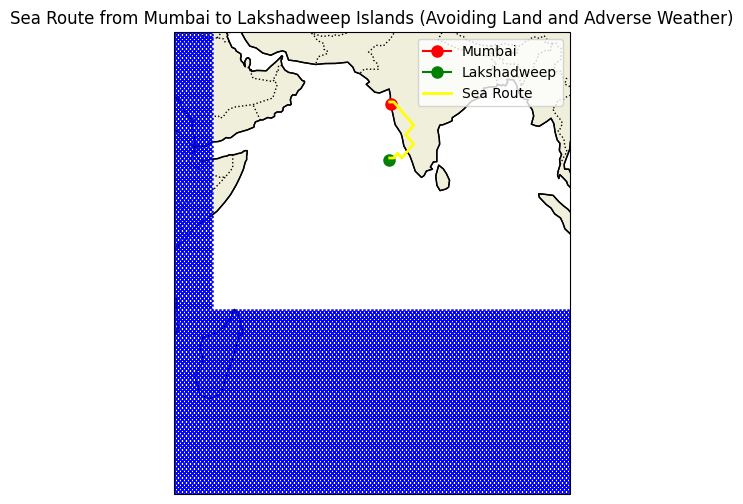

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from heapq import heappush, heappop

# Mumbai and Lakshadweep Islands coordinates
mumbai_coords = (19.0760, 72.8777)  # Mumbai: Latitude, Longitude
lakshadweep_coords = (10.5667, 72.6420)  # Lakshadweep Islands: Latitude, Longitude

# # Define the extent for the map (focused on Mumbai and Lakshadweep region)
# lat_bounds = [5, 25]  # Latitude bounds for visualization (adjusted to cover Lakshadweep)
# lon_bounds = [70, 75]  # Longitude bounds for visualization (covers Mumbai and Lakshadweep region)
# grid_size = (200, 200)  # Grid size for fine resolution

# # Create a lat/lon grid
# lat_grid = np.linspace(lat_bounds[0], lat_bounds[1], grid_size[0])
# lon_grid = np.linspace(lon_bounds[0], lon_bounds[1], grid_size[1])

# Updated extent for a larger area of the Indian Ocean
lat_bounds = [-40, 30]  # Latitude bounds for visualization (extends further south)
lon_bounds = [40, 100]  # Longitude bounds for visualization (extends further east)

# Update the lat/lon grid accordingly
grid_size = (100, 100)  # Keep the grid size constant for simplicity

lat_grid = np.linspace(lat_bounds[0], lat_bounds[1], grid_size[0])
lon_grid = np.linspace(lon_bounds[0], lon_bounds[1], grid_size[1])

# Function to find the grid point for a given latitude and longitude
def find_grid_point(lat, lon, lat_grid, lon_grid):
    lat_idx = np.argmin(np.abs(lat_grid - lat))
    lon_idx = np.argmin(np.abs(lon_grid - lon))
    return (lat_idx, lon_idx)

start_point = find_grid_point(mumbai_coords[0], mumbai_coords[1], lat_grid, lon_grid)
end_point = find_grid_point(lakshadweep_coords[0], lakshadweep_coords[1], lat_grid, lon_grid)

# Generate a land mask (1 = land, 0 = sea, 1 for impassable regions due to weather)
land_mask = np.zeros(grid_size)

# Mark land on the map (rough approximation)
land_mask[0:40, :] = 1  # land in the northern part (representing India's landmass)
land_mask[:, 0:10] = 1  # land on the left (western coast)

# Simulate impassable regions in the sea due to bad weather, waves, and wind
land_mask[100:110, 50:60] = 1  # Example impassable area due to weather
land_mask[30:40, 130:140] = 1  # Another impassable area

# A* algorithm to find the shortest sea path
def heuristic(a, b):
    return np.sqrt((a[0] - b[0])*2 + (a[1] - b[1])*2)

def a_star(start, goal, land_mask):
    rows, cols = land_mask.shape
    open_list = []
    heappush(open_list, (0, start))
    came_from = {start: None}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    # Include diagonal movements for better routing (8 neighbors)
    neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0), (-1, -1), (1, 1), (-1, 1), (1, -1)]

    while open_list:
        _, current = heappop(open_list)

        if current == goal:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        for d in neighbors:
            neighbor = (current[0] + d[0], current[1] + d[1])

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if land_mask[neighbor] == 1:  # Skip land and impassable regions
                    continue

                tentative_g_score = g_score[current] + heuristic(current, neighbor)
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heappush(open_list, (f_score[neighbor], neighbor))

    return None

# Find the sea route using A*
path = a_star(start_point, end_point, land_mask)

# Check if a valid path was found
if path is None:
    print("No valid sea route could be found!")
else:
    # Convert path to lat/lon coordinates
    lat_route = [lat_grid[p[0]] for p in path]
    lon_route = [lon_grid[p[1]] for p in path]

    # Plot the route on a map
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

    # Add coastlines and other geographical features
    ax.coastlines()
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot Mumbai and Lakshadweep on the map
    ax.plot(mumbai_coords[1], mumbai_coords[0], color='red', marker='o', markersize=8, label='Mumbai', transform=ccrs.PlateCarree())
    ax.plot(lakshadweep_coords[1], lakshadweep_coords[0], color='green', marker='o', markersize=8, label='Lakshadweep', transform=ccrs.PlateCarree())

    # Plot the sea route
    ax.plot(lon_route, lat_route, color='yellow', linewidth=2, label='Sea Route', transform=ccrs.PlateCarree())

    # Highlight impassable regions due to weather
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if land_mask[i, j] == 1:
                ax.plot(lon_grid[j], lat_grid[i], color='blue', marker='x', markersize=4, transform=ccrs.PlateCarree())

    # Add labels and a title
    plt.title("Sea Route from Mumbai to Lakshadweep Islands (Avoiding Land and Adverse Weather)")
    plt.legend(loc='upper right')

    plt.show()


<ipython-input-35-b53b834d38a2>:52: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((a[0] - b[0])*2 + (a[1] - b[1])*2)


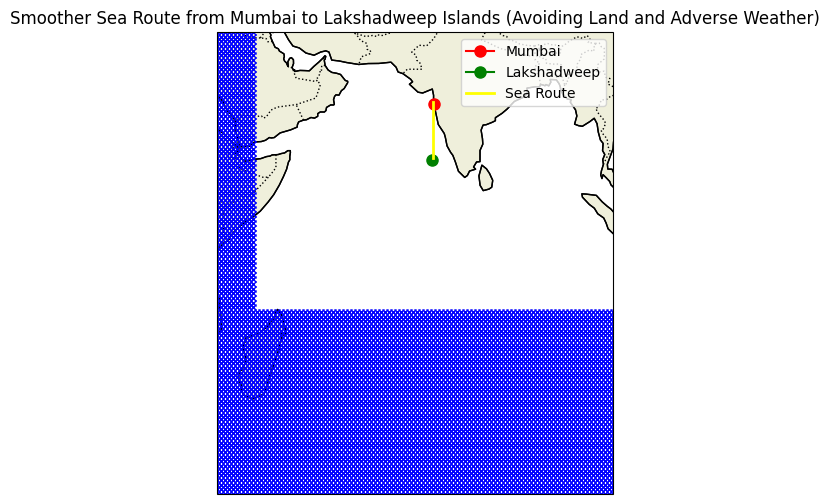

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from heapq import heappush, heappop

# Mumbai and Lakshadweep Islands coordinates
mumbai_coords = (19.0760, 72.8777)  # Mumbai: Latitude, Longitude
lakshadweep_coords = (10.5667, 72.6420)  # Lakshadweep Islands: Latitude, Longitude

# # Define the extent for the map (focused on Mumbai and Lakshadweep region)
# lat_bounds = [5, 25]  # Latitude bounds for visualization (adjusted to cover Lakshadweep)
# lon_bounds = [70, 75]  # Longitude bounds for visualization (covers Mumbai and Lakshadweep region)
# grid_size = (200, 200)  # Grid size for fine resolution

# # Create a lat/lon grid
# lat_grid = np.linspace(lat_bounds[0], lat_bounds[1], grid_size[0])
# lon_grid = np.linspace(lon_bounds[0], lon_bounds[1], grid_size[1])

# Updated extent for a larger area of the Indian Ocean
lat_bounds = [-40, 30]  # Latitude bounds for visualization (extends further south)
lon_bounds = [40, 100]  # Longitude bounds for visualization (extends further east)

# Update the lat/lon grid accordingly
grid_size = (100, 100)  # Keep the grid size constant for simplicity

lat_grid = np.linspace(lat_bounds[0], lat_bounds[1], grid_size[0])
lon_grid = np.linspace(lon_bounds[0], lon_bounds[1], grid_size[1])

# Function to find the grid point for a given latitude and longitude
def find_grid_point(lat, lon, lat_grid, lon_grid):
    lat_idx = np.argmin(np.abs(lat_grid - lat))
    lon_idx = np.argmin(np.abs(lon_grid - lon))
    return (lat_idx, lon_idx)

start_point = find_grid_point(mumbai_coords[0], mumbai_coords[1], lat_grid, lon_grid)
end_point = find_grid_point(lakshadweep_coords[0], lakshadweep_coords[1], lat_grid, lon_grid)

# Generate a land mask (1 = land, 0 = sea, 1 for impassable regions due to weather)
land_mask = np.zeros(grid_size)

# Mark land on the map (rough approximation)
land_mask[0:40, :] = 1  # land in the northern part (representing India's landmass)
land_mask[:, 0:10] = 1  # land on the left (western coast)

# Simulate impassable regions in the sea due to bad weather, waves, and wind
land_mask[100:110, 50:60] = 1  # Example impassable area due to weather
land_mask[30:40, 130:140] = 1  # Another impassable area

# A* algorithm to find the shortest sea path
def heuristic(a, b):
    return np.sqrt((a[0] - b[0])*2 + (a[1] - b[1])*2)

# Modify neighbors to reduce diagonal movement influence
def a_star(start, goal, land_mask):
    rows, cols = land_mask.shape
    open_list = []
    heappush(open_list, (0, start))
    came_from = {start: None}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    # Reduced diagonal movement influence (fewer diagonal neighbors)
    neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Only allow cardinal directions

    while open_list:
        _, current = heappop(open_list)

        if current == goal:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        for d in neighbors:
            neighbor = (current[0] + d[0], current[1] + d[1])

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if land_mask[neighbor] == 1:  # Skip land and impassable regions
                    continue

                tentative_g_score = g_score[current] + heuristic(current, neighbor)
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heappush(open_list, (f_score[neighbor], neighbor))

    return None

# Find the sea route using A*
path = a_star(start_point, end_point, land_mask)

# Check if a valid path was found
if path is None:
    print("No valid sea route could be found!")
else:
    # Convert path to lat/lon coordinates
    lat_route = [lat_grid[p[0]] for p in path]
    lon_route = [lon_grid[p[1]] for p in path]

    # Plot the route on a map
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

    # Add coastlines and other geographical features
    ax.coastlines()
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot Mumbai and Lakshadweep on the map
    ax.plot(mumbai_coords[1], mumbai_coords[0], color='red', marker='o', markersize=8, label='Mumbai', transform=ccrs.PlateCarree())
    ax.plot(lakshadweep_coords[1], lakshadweep_coords[0], color='green', marker='o', markersize=8, label='Lakshadweep', transform=ccrs.PlateCarree())

    # Plot the sea route
    ax.plot(lon_route, lat_route, color='yellow', linewidth=2, label='Sea Route', transform=ccrs.PlateCarree())

    # Highlight impassable regions due to weather
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if land_mask[i, j] == 1:
                ax.plot(lon_grid[j], lat_grid[i], color='blue', marker='x', markersize=4, transform=ccrs.PlateCarree())

    # Add labels and a title
    plt.title("Smoother Sea Route from Mumbai to Lakshadweep Islands (Avoiding Land and Adverse Weather)")
    plt.legend(loc='upper right')

    plt.show()

In [ ]:
# Lakshadweep (Agatti Island) and Maldives (Malé) coordinates
lakshadweep_coords = (10.7865, 72.1890)  # Agatti Island, Lakshadweep: Latitude, Longitude
maldives_coords = (4.1755, 73.5093)      # Malé, Maldives: Latitude, Longitude

# Update the start_point and end_point
start_point = find_grid_point(lakshadweep_coords[0], lakshadweep_coords[1], lat_grid, lon_grid)
end_point = find_grid_point(maldives_coords[0], maldives_coords[1], lat_grid, lon_grid)


In [ ]:
# Lakshadweep (Agatti Island) and Maldives (Malé) coordinates
lakshadweep_coords = (10.7865, 72.1890)  # Agatti Island, Lakshadweep: Latitude, Longitude
maldives_coords = (4.1755, 73.5093)      # Malé, Maldives: Latitude, Longitude

# Update the start_point and end_point
start_point = find_grid_point(lakshadweep_coords[0], lakshadweep_coords[1], lat_grid, lon_grid)
end_point = find_grid_point(maldives_coords[0], maldives_coords[1], lat_grid, lon_grid)

# (Rest of your existing code remains unchanged)


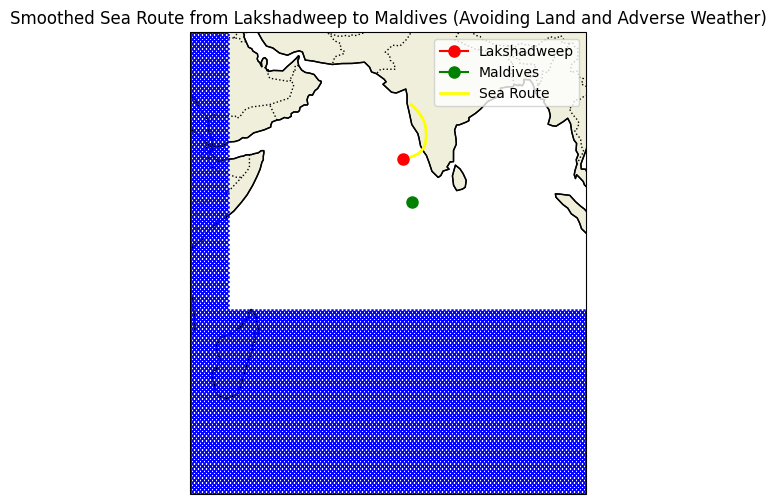

In [ ]:
# Lakshadweep (Agatti Island) and Maldives (Malé) coordinates
lakshadweep_coords = (10.7865, 72.1890)  # Agatti Island, Lakshadweep: Latitude, Longitude
maldives_coords = (4.1755, 73.5093)      # Malé, Maldives: Latitude, Longitude

start_point = find_grid_point(lakshadweep_coords[0], lakshadweep_coords[1], lat_grid, lon_grid)
end_point = find_grid_point(maldives_coords[0], maldives_coords[1], lat_grid, lon_grid)

# (Your existing A* pathfinding code remains unchanged)

# Check if a valid path was found
if path is None:
    print("No valid sea route could be found!")
else:
    # Convert path to lat/lon coordinates
    lat_route = [lat_grid[p[0]] for p in path]
    lon_route = [lon_grid[p[1]] for p in path]

    # Smooth the route to make it more curved
    lat_route_smooth = gaussian_filter1d(lat_route, sigma=2)
    lon_route_smooth = gaussian_filter1d(lon_route, sigma=2)

    # Plot the route on a map
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

    # Add coastlines and other geographical features
    ax.coastlines()
    ax.add_feature(cfeature.LAND, edgecolor='black')  # Only land features
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot Lakshadweep and Maldives on the map
    ax.plot(lakshadweep_coords[1], lakshadweep_coords[0], color='red', marker='o', markersize=8, label='Lakshadweep', transform=ccrs.PlateCarree())
    ax.plot(maldives_coords[1], maldives_coords[0], color='green', marker='o', markersize=8, label='Maldives', transform=ccrs.PlateCarree())

    # Plot the smoothed sea route
    ax.plot(lon_route_smooth, lat_route_smooth, color='yellow', linewidth=2, label='Sea Route', transform=ccrs.PlateCarree())

    # Highlight impassable regions due to weather
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if land_mask[i, j] == 1:
                ax.plot(lon_grid[j], lat_grid[i], color='blue', marker='x', markersize=4, transform=ccrs.PlateCarree())

    # Set the background color of the entire figure to white
    fig.patch.set_facecolor('white')

    # Add labels and a title
    plt.title("Smoothed Sea Route from Lakshadweep to Maldives (Avoiding Land and Adverse Weather)")
    plt.legend(loc='upper right')

    # Save the plot
    #plt.savefig("lakshadweep_to_maldives_route.png")  # Change filename as needed
    plt.show()


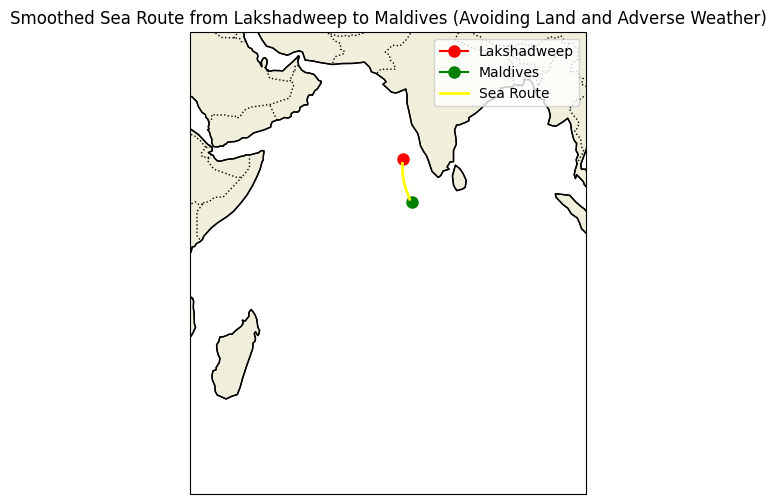

In [ ]:
# Adjust the heuristic for better diagonal movement
def heuristic(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)  # Euclidean distance

# Ensure land_mask reflects accurate land and water representation
land_mask = np.zeros(grid_size)

# Mark land for Lakshadweep and the Maldives appropriately
land_mask[0:20, 60:100] = 1  # Example land for Lakshadweep
land_mask[0:20, 0:30] = 1    # Example land for Maldives

# Recheck if any larger regions need marking as impassable
land_mask[30:50, 40:80] = 1  # Example impassable weather areas

# Ensure pathfinding parameters are set appropriately
start_point = find_grid_point(lakshadweep_coords[0], lakshadweep_coords[1], lat_grid, lon_grid)
end_point = find_grid_point(maldives_coords[0], maldives_coords[1], lat_grid, lon_grid)

# Find the sea route using A*
path = a_star(start_point, end_point, land_mask)

# Validate path existence
if path is None:
    print("No valid sea route could be found!")
else:
    # Convert path to lat/lon coordinates
    lat_route = [lat_grid[p[0]] for p in path]
    lon_route = [lon_grid[p[1]] for p in path]

    # Smooth the route
    lat_route_smooth = gaussian_filter1d(lat_route, sigma=2)
    lon_route_smooth = gaussian_filter1d(lon_route, sigma=2)

    # Plot the route
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

    # Plot features
    ax.coastlines()
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot locations
    ax.plot(lakshadweep_coords[1], lakshadweep_coords[0], color='red', marker='o', markersize=8, label='Lakshadweep', transform=ccrs.PlateCarree())
    ax.plot(maldives_coords[1], maldives_coords[0], color='green', marker='o', markersize=8, label='Maldives', transform=ccrs.PlateCarree())

    # Plot route
    ax.plot(lon_route_smooth, lat_route_smooth, color='yellow', linewidth=2, label='Sea Route', transform=ccrs.PlateCarree())

    plt.title("Smoothed Sea Route from Lakshadweep to Maldives (Avoiding Land and Adverse Weather)")
    plt.legend(loc='upper right')

    # Save the plot
    plt.savefig("lakshadweep_to_maldives_route.png")
    plt.show()


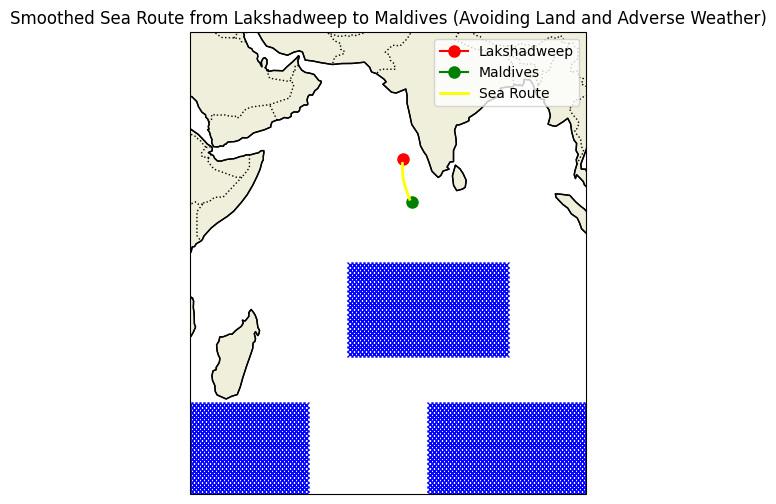

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from heapq import heappush, heappop
from scipy.ndimage import gaussian_filter1d

# Lakshadweep (Agatti Island) and Maldives (Malé) coordinates
lakshadweep_coords = (10.7865, 72.1890)  # Agatti Island, Lakshadweep: Latitude, Longitude
maldives_coords = (4.1755, 73.5093)      # Malé, Maldives: Latitude, Longitude

# Updated extent for a larger area of the Indian Ocean
lat_bounds = [-40, 30]  # Latitude bounds for visualization (extends further south)
lon_bounds = [40, 100]  # Longitude bounds for visualization (extends further east)

# Update the lat/lon grid accordingly
grid_size = (100, 100)  # Keep the grid size constant for simplicity

lat_grid = np.linspace(lat_bounds[0], lat_bounds[1], grid_size[0])
lon_grid = np.linspace(lon_bounds[0], lon_bounds[1], grid_size[1])

# Function to find the grid point for a given latitude and longitude
def find_grid_point(lat, lon, lat_grid, lon_grid):
    lat_idx = np.argmin(np.abs(lat_grid - lat))
    lon_idx = np.argmin(np.abs(lon_grid - lon))
    return (lat_idx, lon_idx)

# Define start and end points
start_point = find_grid_point(lakshadweep_coords[0], lakshadweep_coords[1], lat_grid, lon_grid)
end_point = find_grid_point(maldives_coords[0], maldives_coords[1], lat_grid, lon_grid)

# Generate a land mask (1 = land, 0 = sea, 1 for impassable regions due to weather)
land_mask = np.zeros(grid_size)

# Mark land for Lakshadweep and the Maldives
land_mask[0:20, 60:100] = 1  # Land in Lakshadweep
land_mask[0:20, 0:30] = 1    # Land in Maldives

# Add impassable regions due to weather
land_mask[30:50, 40:80] = 1  # Example impassable weather areas

# A* algorithm to find the shortest sea path
def heuristic(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)  # Euclidean distance

def a_star(start, goal, land_mask):
    rows, cols = land_mask.shape
    open_list = []
    heappush(open_list, (0, start))
    came_from = {start: None}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_list:
        _, current = heappop(open_list)

        if current == goal:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        # Allow for diagonal movements
        neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]

        for d in neighbors:
            neighbor = (current[0] + d[0], current[1] + d[1])

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if land_mask[neighbor] == 1:  # Skip land and impassable regions
                    continue

                tentative_g_score = g_score[current] + heuristic(current, neighbor)
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heappush(open_list, (f_score[neighbor], neighbor))

    return None

# Find the sea route using A*
path = a_star(start_point, end_point, land_mask)

# Check if a valid path was found
if path is None:
    print("No valid sea route could be found!")
else:
    # Convert path to lat/lon coordinates
    lat_route = [lat_grid[p[0]] for p in path]
    lon_route = [lon_grid[p[1]] for p in path]

    # Smooth the route to make it more curved
    lat_route_smooth = gaussian_filter1d(lat_route, sigma=2)
    lon_route_smooth = gaussian_filter1d(lon_route, sigma=2)

    # Plot the route on a map
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

    # Add coastlines and other geographical features
    ax.coastlines()
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot Lakshadweep and Maldives on the map
    ax.plot(lakshadweep_coords[1], lakshadweep_coords[0], color='red', marker='o', markersize=8, label='Lakshadweep', transform=ccrs.PlateCarree())
    ax.plot(maldives_coords[1], maldives_coords[0], color='green', marker='o', markersize=8, label='Maldives', transform=ccrs.PlateCarree())

    # Plot the smoothed sea route
    ax.plot(lon_route_smooth, lat_route_smooth, color='yellow', linewidth=2, label='Sea Route', transform=ccrs.PlateCarree())

    # Highlight impassable regions due to weather
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if land_mask[i, j] == 1:
                ax.plot(lon_grid[j], lat_grid[i], color='blue', marker='x', markersize=4, transform=ccrs.PlateCarree())

    # Set the background color of the entire figure to white
    fig.patch.set_facecolor('white')

    # Add labels and a title
    plt.title("Smoothed Sea Route from Lakshadweep to Maldives (Avoiding Land and Adverse Weather)")
    plt.legend(loc='upper right')

    # Save the plot
    plt.savefig("lakshadweep_to_maldives_route.png")  # Change filename as needed
    plt.show()
